The code is modified from  [MorvanZhou/NLP-Tutorials/tf_idf_sklearn.py](https://github.com/MorvanZhou/NLP-Tutorials/blob/master/tf_idf_sklearn.py) 

In [ ]:
##library
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [ ]:
# get the abstract data of APSMarch2021
!wget https://github.com/shijiale0609/NLP_APS_abstract/raw/main/APSMarch2021.pkl


--2021-02-15 16:16:00--  https://github.com/shijiale0609/NLP_APS_abstract/raw/main/APSMarch2021.pkl
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shijiale0609/NLP_APS_abstract/main/APSMarch2021.pkl [following]
--2021-02-15 16:16:00--  https://raw.githubusercontent.com/shijiale0609/NLP_APS_abstract/main/APSMarch2021.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15725598 (15M) [application/octet-stream]
Saving to: ‘APSMarch2021.pkl’

APSMarch2021.pkl    100%[===================>]  15.00M  93.0MB/s    in 0.2s    

2021-02-15 16:16:01 (93.0 MB/s) - ‘APSMarch2021.pkl’ saved [15725598/1572

In [ ]:
# read the data
df = pd.read_pickle('APSMarch2021.pkl')

In [ ]:
print (df['url'][7687])
print (df['Title'][7687])
print (df['Abstract'][7687])


https://meetings.aps.org/Meeting/MAR21/Session/S41.10
Antiferromagnetic ordering and 5f-electron localization in metallic PuPdSn
While the effect of electronic correlations is relatively well studied in Ce, Yb and U based materials, there is still lack of knowledge on how these collective phenomena impact magnetic, transport, and thermodynamic properties in transuranium intermetallics. Depending upon the strength of the interactions, many unusual properties such as complex magnetism, Kondo effect, heavy fermion ground state, valence fluctuations, and/or unconventional superconductivity have been observed in these materials. Here we present our detailed studies on the structural, magnetic, thermal, and transport properties of PuPdSn. This compound crystalizes in the hexagonal ZrNiAl-type of structure [space group P62m]. It orders antiferromagnetically at TN = 21 K that is followed by another AF-like transition at 9.6 K. The low-temperature linear specific heat coefficient is small, γ∼8 

In [ ]:
df


,url,Title,Authors,Abstract
0,https://meetings.aps.org/Meeting/MAR21/Session...,Block Polymers: Extraordinary Consequences of ...,"[\nFrank Bates\n\n(University of Minnesota)\n,...",Block polymers are a ubiquitous form of macrom...
1,https://meetings.aps.org/Meeting/MAR21/Session...,Computer Simulations of Entangled Polymer Melt...,[\nGary Grest\n\n(Sandia National Laboratories...,From the first numerical simulations of single...
2,https://meetings.aps.org/Meeting/MAR21/Session...,Application of Polymer Physics to tissue visco...,[\nFrancoise Brochard-Wyart\n\n(PhysicoChimieC...,We first introduce the field of “Entangled Act...
3,https://meetings.aps.org/Meeting/MAR21/Session...,"Polymers Science in Modeling Mushy, Squishy Sy...",[\nAnna Balazs\n\n(University of Pittsburgh)\n...,"Over the last few decades, there has been rapi..."
4,https://meetings.aps.org/Meeting/MAR21/Session...,Progress in understanding entangled polymer dy...,[\nScott Milner\n\n(Pennsylvania State Univers...,The surprising flow behavior of entangled poly...
...,...,...,...,...
10089,https://meetings.aps.org/Meeting/MAR21/Session...,Atomistic investigation on the effect of diffe...,[\nMD Turash Haque Pial\n\n(Department of Mech...,The structural behavior of a polyelectrolyte (...
10090,https://meetings.aps.org/Meeting/MAR21/Session...,Isotropic Bulk Heterojunctions with Multiple E...,[\nRabindra Dulal\n\n(University of Wyoming)\n...,It is widely believed that the active layers o...
10091,https://meetings.aps.org/Meeting/MAR21/Session...,Probing Stretchable Features of Conjugated Pol...,[\nWenkai Zhong\n\n(Lawrence Berkeley National...,Great advances have been made in stretchable/f...
10092,https://meetings.aps.org/Meeting/MAR21/Session...,Crystallization and phase behavior in hybrid o...,"[\nGurmukh Sethi\n\n(University of California,...",Polymer electrolytes are a promising avenue to...


In [ ]:
abnormal_list = []
for i in range(0,df['Abstract'].shape[0]):
  if len(df['Abstract'][i].split()) <=13:
    print (i, df['Abstract'][i])
    abnormal_list.append(i)

853 As discussed by GMAG and GMED conference committees
974 .
1078 TBD
1520 expert
1561 chosen invited speaker for approved GSNP focus session
2018 Selected by Focus Topic Organizer (Tom Harris)
2212 2020 APS Fellow
2939 As discussed by GDS and GMED conference committees
3056 Phys. Rev. Lett. 124, 063601 (2020)
4300 DPOLY Business Meeting (6:00pm-7:00pm)
4302 [nonscientific] GMED Business Meting (6:00pm-7:00pm)
4303 GSNP Business Meeting (6:00pm-7:00pm)
4304 DCP Business Meeting (6:00pm-7:00pm)
4305 GMAG Business Meeting (6:00pm-7:00pm)
4306 DMP Business Meeting (6:00pm-7:00pm)
4307 GERA Business Meeting (6:00pm-7:00pm)
5823 TBD
6469 GDS Business Meeting (6:00pm-7:00pm)
6474 DSOFT Business Meeting
6476 GSCCM Business Meeting (6:00pm-7:00pm)
6477 GIMS Business Meeting (6:00pm-7:00pm)
6666 chosen invited speaker for approved GSNP focus session
6764 Multiple pioneering works in the subject
7166 N/A
7344 expert
7511 George E. Valley, Jr. Prize
9380 N/A


In [ ]:
df.drop(abnormal_list, inplace=True)
df

,url,Title,Authors,Abstract
0,https://meetings.aps.org/Meeting/MAR21/Session...,Block Polymers: Extraordinary Consequences of ...,"[\nFrank Bates\n\n(University of Minnesota)\n,...",Block polymers are a ubiquitous form of macrom...
1,https://meetings.aps.org/Meeting/MAR21/Session...,Computer Simulations of Entangled Polymer Melt...,[\nGary Grest\n\n(Sandia National Laboratories...,From the first numerical simulations of single...
2,https://meetings.aps.org/Meeting/MAR21/Session...,Application of Polymer Physics to tissue visco...,[\nFrancoise Brochard-Wyart\n\n(PhysicoChimieC...,We first introduce the field of “Entangled Act...
3,https://meetings.aps.org/Meeting/MAR21/Session...,"Polymers Science in Modeling Mushy, Squishy Sy...",[\nAnna Balazs\n\n(University of Pittsburgh)\n...,"Over the last few decades, there has been rapi..."
4,https://meetings.aps.org/Meeting/MAR21/Session...,Progress in understanding entangled polymer dy...,[\nScott Milner\n\n(Pennsylvania State Univers...,The surprising flow behavior of entangled poly...
...,...,...,...,...
10089,https://meetings.aps.org/Meeting/MAR21/Session...,Atomistic investigation on the effect of diffe...,[\nMD Turash Haque Pial\n\n(Department of Mech...,The structural behavior of a polyelectrolyte (...
10090,https://meetings.aps.org/Meeting/MAR21/Session...,Isotropic Bulk Heterojunctions with Multiple E...,[\nRabindra Dulal\n\n(University of Wyoming)\n...,It is widely believed that the active layers o...
10091,https://meetings.aps.org/Meeting/MAR21/Session...,Probing Stretchable Features of Conjugated Pol...,[\nWenkai Zhong\n\n(Lawrence Berkeley National...,Great advances have been made in stretchable/f...
10092,https://meetings.aps.org/Meeting/MAR21/Session...,Crystallization and phase behavior in hybrid o...,"[\nGurmukh Sethi\n\n(University of California,...",Polymer electrolytes are a promising avenue to...


In [ ]:
df.reset_index(drop=True, inplace=True)
df

,url,Title,Authors,Abstract
0,https://meetings.aps.org/Meeting/MAR21/Session...,Block Polymers: Extraordinary Consequences of ...,"[\nFrank Bates\n\n(University of Minnesota)\n,...",Block polymers are a ubiquitous form of macrom...
1,https://meetings.aps.org/Meeting/MAR21/Session...,Computer Simulations of Entangled Polymer Melt...,[\nGary Grest\n\n(Sandia National Laboratories...,From the first numerical simulations of single...
2,https://meetings.aps.org/Meeting/MAR21/Session...,Application of Polymer Physics to tissue visco...,[\nFrancoise Brochard-Wyart\n\n(PhysicoChimieC...,We first introduce the field of “Entangled Act...
3,https://meetings.aps.org/Meeting/MAR21/Session...,"Polymers Science in Modeling Mushy, Squishy Sy...",[\nAnna Balazs\n\n(University of Pittsburgh)\n...,"Over the last few decades, there has been rapi..."
4,https://meetings.aps.org/Meeting/MAR21/Session...,Progress in understanding entangled polymer dy...,[\nScott Milner\n\n(Pennsylvania State Univers...,The surprising flow behavior of entangled poly...
...,...,...,...,...
10062,https://meetings.aps.org/Meeting/MAR21/Session...,Atomistic investigation on the effect of diffe...,[\nMD Turash Haque Pial\n\n(Department of Mech...,The structural behavior of a polyelectrolyte (...
10063,https://meetings.aps.org/Meeting/MAR21/Session...,Isotropic Bulk Heterojunctions with Multiple E...,[\nRabindra Dulal\n\n(University of Wyoming)\n...,It is widely believed that the active layers o...
10064,https://meetings.aps.org/Meeting/MAR21/Session...,Probing Stretchable Features of Conjugated Pol...,[\nWenkai Zhong\n\n(Lawrence Berkeley National...,Great advances have been made in stretchable/f...
10065,https://meetings.aps.org/Meeting/MAR21/Session...,Crystallization and phase behavior in hybrid o...,"[\nGurmukh Sethi\n\n(University of California,...",Polymer electrolytes are a promising avenue to...


In [ ]:
#df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'length1'], inplace=True)

In [ ]:
#df.drop(columns=['length2','length3', 'length4', 'Abstract_polarity', 'Title_polarity'], inplace=True)

In [ ]:
df

,url,Title,Authors,Abstract
0,https://meetings.aps.org/Meeting/MAR21/Session...,Block Polymers: Extraordinary Consequences of ...,"[\nFrank Bates\n\n(University of Minnesota)\n,...",Block polymers are a ubiquitous form of macrom...
1,https://meetings.aps.org/Meeting/MAR21/Session...,Computer Simulations of Entangled Polymer Melt...,[\nGary Grest\n\n(Sandia National Laboratories...,From the first numerical simulations of single...
2,https://meetings.aps.org/Meeting/MAR21/Session...,Application of Polymer Physics to tissue visco...,[\nFrancoise Brochard-Wyart\n\n(PhysicoChimieC...,We first introduce the field of “Entangled Act...
3,https://meetings.aps.org/Meeting/MAR21/Session...,"Polymers Science in Modeling Mushy, Squishy Sy...",[\nAnna Balazs\n\n(University of Pittsburgh)\n...,"Over the last few decades, there has been rapi..."
4,https://meetings.aps.org/Meeting/MAR21/Session...,Progress in understanding entangled polymer dy...,[\nScott Milner\n\n(Pennsylvania State Univers...,The surprising flow behavior of entangled poly...
...,...,...,...,...
10062,https://meetings.aps.org/Meeting/MAR21/Session...,Atomistic investigation on the effect of diffe...,[\nMD Turash Haque Pial\n\n(Department of Mech...,The structural behavior of a polyelectrolyte (...
10063,https://meetings.aps.org/Meeting/MAR21/Session...,Isotropic Bulk Heterojunctions with Multiple E...,[\nRabindra Dulal\n\n(University of Wyoming)\n...,It is widely believed that the active layers o...
10064,https://meetings.aps.org/Meeting/MAR21/Session...,Probing Stretchable Features of Conjugated Pol...,[\nWenkai Zhong\n\n(Lawrence Berkeley National...,Great advances have been made in stretchable/f...
10065,https://meetings.aps.org/Meeting/MAR21/Session...,Crystallization and phase behavior in hybrid o...,"[\nGurmukh Sethi\n\n(University of California,...",Polymer electrolytes are a promising avenue to...


In [ ]:
print (df['Title'][7687])
print (df['url'][7687])

Level statistics of the strained Kitaev honeycomb model with Heisenberg interactions and disorder
https://meetings.aps.org/Meeting/MAR21/Session/S43.6


In [ ]:
## get the titles for all the abstract. 
title_list = df['Title'].tolist()
abstract_list = df['Abstract'].tolist()

In [ ]:
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(title_list)


In [ ]:
print("idf: ", [(n, idf) for idf, n in zip(vectorizer.idf_, vectorizer.get_feature_names())])
print("v2i: ", vectorizer.vocabulary_)

idf:  [('000', 9.523970175695261), ('0001', 8.607679443821105), ('001', 7.272678377088766), ('010', 9.118505067587098), ('0276', 9.523970175695261), ('09', 9.523970175695261), ('0fe1', 9.523970175695261), ('10', 8.42535788702715), ('100', 7.914532263261161), ('10216', 9.523970175695261), ('10fff', 9.523970175695261), ('11', 9.118505067587098), ('110', 7.819222083456836), ('111', 6.959020818233724), ('113', 9.523970175695261), ('1144', 9.523970175695261), ('12', 9.118505067587098), ('122', 9.118505067587098), ('125cuo4', 9.118505067587098), ('125mno3', 9.523970175695261), ('125te', 9.523970175695261), ('129mxe', 9.523970175695261), ('12cuo4', 9.523970175695261), ('13', 9.118505067587098), ('130', 9.523970175695261), ('131mxe', 9.523970175695261), ('133mxe', 9.523970175695261), ('133xe', 9.523970175695261), ('135xe', 9.523970175695261), ('143', 9.523970175695261), ('150', 9.523970175695261), ('1550', 9.523970175695261), ('1651', 9.523970175695261), ('167er3', 9.523970175695261), ('17', 9

In [ ]:
vectorizer_abstract = TfidfVectorizer()
tf_idf_abstract = vectorizer_abstract.fit_transform(abstract_list)
#print("idf: ", [(n, idf) for idf, n in zip(vectorizer_abstract.idf_, vectorizer_abstract.get_feature_names())])
#print("v2i: ", vectorizer_abstract.vocabulary_)

In [ ]:
#search_string = "Free energy calculation for polymers simulation"
search_string = "Colloidal Diamond"
#q = "enhanced sampling"


In [ ]:
qtf_idf = vectorizer.transform([search_string])
qtf_idf_abstract = vectorizer_abstract.transform([search_string])

In [ ]:
### get the cosine similarity between the input embedding vector and the titles' and abstracts' embedding vectors.
res_title = cosine_similarity(tf_idf, qtf_idf) 
res_abstract = cosine_similarity(tf_idf_abstract, qtf_idf_abstract)

## Visualize the cosine similarity ($\rm res_{title}$) between the input embedding vector and the titles' embedding vectors and the cosine similarity ($\rm res_{abstract}$) between the input embedding vector and the abstracts' embedding vectors

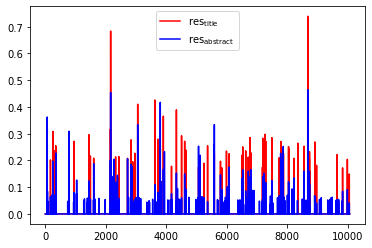

In [ ]:
plt.plot(res_title, color='r', label = r'${\rm res_{title}}$')
plt.plot(res_abstract, c='b', label = r'${\rm res_{abstract}}$')
plt.legend()
plt.ylim
plt.show()

In [ ]:
### set the weights for title and abstract
weight_title = 2.0
weight_abstract = 1.0

#res = res_title* res_abstract
#res = weight_title * res_title + weight_abstract * res_abstract
# if want the cosine similarity to be normalized, replace with the commentted code
res = weight_title * res_title/max(res_title) + weight_abstract * res_abstract/max(res_abstract)

### sort the cosine similarity and get the top n titles' index
n = 10
res1 = res.ravel().argsort()[-n:]
res1 = res1.tolist()
res1.reverse()

print ("Top " + str(n), "titles for '{}':".format(search_string))
for i in range(0, len(res1)):
    print(i+1, "cosine similarity = ", res[res1[i]][0], '\n', "Title:",title_list[res1[i]], '\n', 'url:', df['url'][res1[i]])

Top 10 titles for 'Colloidal Diamond':
1 cosine similarity =  3.0 
 Title: Self-Assembly of Colloidal Diamond 
 url: https://meetings.aps.org/Meeting/MAR21/Session/X03.7
2 cosine similarity =  2.82737187195823 
 Title: Colloidal Diamond Photonic Bands 
 url: https://meetings.aps.org/Meeting/MAR21/Session/E07.11
3 cosine similarity =  1.82879112564135 
 Title: High-quality diamond confined open microcavity for diamond-based photonics 
 url: https://meetings.aps.org/Meeting/MAR21/Session/F28.6
4 cosine similarity =  1.5740334357375676 
 Title: Facile diamond synthesis from lower diamondoids 
 url: https://meetings.aps.org/Meeting/MAR21/Session/J23.2
5 cosine similarity =  1.5004227030424753 
 Title: Traction Rheoscopy of Colloidal Glass 
 url: https://meetings.aps.org/Meeting/MAR21/Session/A06.13
6 cosine similarity =  1.3879876826903381 
 Title: Folding of flexible colloidal polymers into colloidal clusters 
 url: https://meetings.aps.org/Meeting/MAR21/Session/J06.3
7 cosine similarity 